# Numpy基本应用

从基础数据结构和常见数学运算两个方面展开。目录结构主要参考[TutorialsPoint NumPy 教程](https://legacy.gitbook.com/book/wizardforcel/ts-numpy-tut/details)。

基本思路是：

1. 首先需要定义数据结构并初始化，这是一切运算的基础；
2. 其次针对基本的数据结构有一些常用的基本操作，包括索引，变形操作等；
3. 最后是基于这些数据结构的数学运算，包括统计的，算术的，逻辑的，集合的，时间等其他类型的等等多方面(这部分内容放在另一个文件中)

## 数据结构及操作

### 向量、矩阵初始化

In [1]:
import numpy as np
"""numpy向量"""
# NumPy向量默认行向量
features = np.array([0.49671415, -0.1382643, 0.64768854])
print(features)
# 对于一维数组，转置之后仍为一维数组
print(features.T)
# 可以用array[:,None]来创建列向量
print(features[:, None])
# 使用zeros初始化
all_zeros = np.zeros([2,2,3])
print(all_zeros)

[ 0.49671415 -0.1382643   0.64768854]
[ 0.49671415 -0.1382643   0.64768854]
[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]]
[[[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]]


和zeros不同, empty并不将数组值设置为0，因此其比zeros稍微快一些；
另一方面，需要用户手动设置数组中的所有值，所以使用的时候要小心。

full函数可以指定用某个值填充若干大小的数组。

还可以使用arange进行初始化。

In [2]:
import numpy as np
e1=np.empty([2, 2])  #uninitialized
print(e1)
e2=np.empty([2, 2], dtype=int)  #uninitialized
print(e2)

out = np.full([10], np.nan)
print(out)
out = np.full([10,2], np.nan)
print(out)
out = np.full([10], 'yes')
print(out)
# arange：numpy.arange([start, ]stop, [step, ]dtype=None)
print(np.arange(3))
print(np.arange(3.0))
print(np.arange(3,7,2))

[[4.67296746e-307 1.69121096e-306]
 [1.37962592e-306 1.11257937e-307]]
[[-2007272825  1757634786]
 [ -736514949 -2036393483]]
[nan nan nan nan nan nan nan nan nan nan]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
['yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes']
[0 1 2]
[0. 1. 2.]
[3 5]


linespace是生成等差数列的好方法，注意是闭区间

In [4]:
np.linspace(2.0, 3.0, num=5)

array([2.  , 2.25, 2.5 , 2.75, 3.  ])

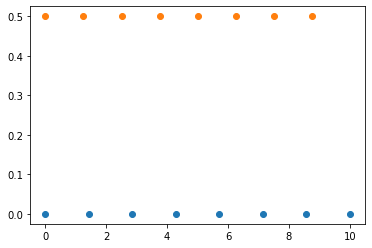

In [6]:
import matplotlib.pyplot as plt
N = 8
y = np.zeros(N)
x1 = np.linspace(0, 10, N, endpoint=True)
x2 = np.linspace(0, 10, N, endpoint=False)
plt.plot(x1, y, 'o')
plt.plot(x2, y + 0.5, 'o')

astype函数是对array的copy，指定到一个特定的数据类型。


In [3]:
x = np.array([1, 2, 2.5])
x.astype(int)

array([1, 2, 2])

如果是初始化多维数据，那么使用grid类的函数是不错的选择。比如mgrid可以快速生成一个三维数组。

In [1]:
import numpy as np
np.mgrid[0:5,0:5]

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [6]:
N=5
X, Y = np.mgrid[-3:3:5, -2:2:complex(0, N)]
X

array([[-3., -3., -3., -3., -3.],
       [ 2.,  2.,  2.,  2.,  2.]])

用复数的形式可以生成两个方向的元素

In [5]:
Y

array([[-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.]])

有时候也会遇到ndarray和list需要相互转化的情况，list转为ndarray就很简单了，就直接np.array即可，反过来转也很容易：

In [4]:
import numpy as np
a=[3.234,34,3.777,6.33]
a= np.array(a)
a.tolist()

[3.234, 34.0, 3.777, 6.33]

日期总是个麻烦的事情，但是很重要的数据类型,numpy也提供了很方便处理日期的工具

In [1]:
import numpy as np
print(np.datetime64('2005-02-25'))
print(np.datetime64('2005-02'))
print(np.datetime64('2005-02', 'D'))
print(np.datetime64('2005-02-25T03:30'))
print(np.array(['2007-07-13', '2006-01-13', '2010-08-13'], dtype='datetime64'))
print(np.array(['2001-01-01T12:00', '2002-02-03T13:56:03.172'], dtype='datetime64'))
print(np.arange('2005-02', '2005-03', dtype='datetime64[D]'))
print(np.arange('1995-01-01', '2000-01-01', dtype='datetime64[Y]'))
print(np.arange('1995-01-01', '2000-01-01', dtype='datetime64[Y]').astype(str))
print(np.datetime64('2005') == np.datetime64('2005-01-01'))
print(np.datetime64('2010-03-14T15Z') == np.datetime64('2010-03-14T15:00:00.00Z'))

2005-02-25
2005-02
2005-02-01
2005-02-25T03:30
['2007-07-13' '2006-01-13' '2010-08-13']
['2001-01-01T12:00:00.000' '2002-02-03T13:56:03.172']
['2005-02-01' '2005-02-02' '2005-02-03' '2005-02-04' '2005-02-05'
 '2005-02-06' '2005-02-07' '2005-02-08' '2005-02-09' '2005-02-10'
 '2005-02-11' '2005-02-12' '2005-02-13' '2005-02-14' '2005-02-15'
 '2005-02-16' '2005-02-17' '2005-02-18' '2005-02-19' '2005-02-20'
 '2005-02-21' '2005-02-22' '2005-02-23' '2005-02-24' '2005-02-25'
 '2005-02-26' '2005-02-27' '2005-02-28']
['1995' '1996' '1997' '1998' '1999']
['1995' '1996' '1997' '1998' '1999']
True
True


C:\Users\hust2\.conda\envs\hydrus\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  if sys.path[0] == '':


关于日期运算，通常结合timedelta

In [1]:
import numpy as np
print(np.datetime64('2009-01-01') - np.datetime64('2008-01-01'))
print(np.datetime64('2009') + np.timedelta64(20, 'D'))
print(np.datetime64('2011-06-15T00:00') + np.timedelta64(12, 'h'))
print(np.timedelta64(1,'W') / np.timedelta64(1,'D'))
# 计算年数
print((np.datetime64('2010') - np.datetime64('2008'))/np.timedelta64(1,'Y'))

366 days
2009-01-21
2011-06-15T12:00
7.0
2.0


还有比较常用的日期和字符串转换

In [2]:
import pytz
d = np.arange('2002-10-27T04:30', 4*60, 60, dtype='M8[m]')
print(d)
np.datetime_as_string(d, timezone='UTC')

['2002-10-27T04:30' '2002-10-27T05:30' '2002-10-27T06:30'
 '2002-10-27T07:30']


array(['2002-10-27T04:30Z', '2002-10-27T05:30Z', '2002-10-27T06:30Z',
       '2002-10-27T07:30Z'], dtype='<U35')

In [9]:
t1=('1995-01-01T00:00:00','1995-01-02T00:00:00','1995-01-01T00:00:00','1995-01-02T00:00:00')
t2=np.array(t1,dtype='datetime64[D]')
t2

array(['1995-01-01', '1995-01-02', '1995-01-01', '1995-01-02'],
      dtype='datetime64[D]')

numpy数组比较的时候和list略有不同

In [1]:
a = [1,2,3]
b = [1,2,3]
a==b

True

In [2]:
import numpy as np
a = np.array(a)
b = np.array(b)
a==b

array([ True,  True,  True])

In [3]:
(a==b).all()

True

In [5]:
b=np.array([1,2,4])
(a==b).any()

True

In [6]:
(a==b).all()

False

list中有多个numpy数组，flat成一个一维numpy数组的方式：

In [1]:
import numpy as np
a1= [np.arange(2),np.arange(3),np.arange(4)]
a1

[array([0, 1]), array([0, 1, 2]), array([0, 1, 2, 3])]

In [10]:
from functools import reduce
# a2=reduce(lambda x,y: np.hstack((x,y)),a1)
# 如果需要排序：
a2=np.sort(reduce(lambda x,y: np.hstack((x,y)),a1))
a2

array([0, 0, 0, 1, 1, 1, 2, 2, 3])

### 切片与索引

ndarray对象的内容可以通过索引或切片来访问和修改，就像 Python 的内置容器对象一样。

ndarray对象中的元素遵循基于零的索引。 有三种可用的索引方法类型： 字段访问，基本切片和高级索引。

#### 基本切片

Numpy 中多维数组的切片操作与 Python 中 list 的切片操作一样，同样由 start, stop, step 三个部分组成;
如果是多维数组，将不同维度上的切片操作用 逗号 分开就好了.

In [3]:
import numpy as np
arr = np.arange(3,7)
print ('array is:', arr)

arr = np.arange(12)
print ('array is:', arr)

slice_one = arr[:4]
print ('slice begins at 0 and ends at 4 is:', slice_one)

slice_two = arr[7:10]
print( 'slice begins at 7 and ends at 10 is:', slice_two)
slice_two_unsort = arr[[8,7]]
print( 'slice at 8 and 7 is:', slice_two_unsort)

slice_three = arr[0:12:4]
print( 'slice begins at 0 and ends at 12 with step 4 is:', slice_three)

arr = np.arange(12).reshape((3, 4))
print ('array is:')
print (arr)

# 取第一维的索引 1 到索引 2 之间的元素，也就是第二行
# 取第二维的索引 1 到索引 3 之间的元素，也就是第二列和第三列
slice_one = arr[1:2, 1:3]
print ('first slice is:')
print (slice_one)

# 取第一维的全部
# 按步长为 2 取第二维的索引 0 到末尾 之间的元素，也就是第一列和第三列
slice_two = arr[:, ::2]
print( 'second slice is:')
print (slice_two)

array is: [3 4 5 6]
array is: [ 0  1  2  3  4  5  6  7  8  9 10 11]
slice begins at 0 and ends at 4 is: [0 1 2 3]
slice begins at 7 and ends at 10 is: [7 8 9]
slice at 8 and 7 is: [8 7]
slice begins at 0 and ends at 12 with step 4 is: [0 4 8]
array is:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
first slice is:
[[5 6]]
second slice is:
[[ 0  2]
 [ 4  6]
 [ 8 10]]


#### 基本索引

对于一个多维数组来说，最简单的情况就是访问其中一个特定位置的元素了.

事实上，在 Numpy 的索引操作方式 `x = arr[obj]` 中， obj 不仅仅可以是一个用逗号分隔开的数字序列，还可以是更复杂的内容。这里介绍用逗号分隔的数组序列，其余在高级索引中见。注意两点：

- 序列的长度和多维数组的维数要一致
- 序列中每个数组的长度要一致

In [11]:
import numpy as np
arr = [
    [1, 2, 3, 4],
    [2, 4, 6, 8],
    [3, 6, 9, 12],
    [4, 8, 12, 16]
]
print( '第二行第二列的值:', arr[1][1])
try:
    print ('第二行第二列的值(尝试用 Numpy 的方式获取):', arr[1, 1])
except Exception as e:
    print (str(e))

arr = np.array([
    [1, 2, 3, 4],
    [2, 4, 6, 8],
    [3, 6, 9, 12],
    [4, 8, 12, 16]
])

print("对应坐标(0,3)和(2,1)的数据：",arr[[0, 2], [3, 1]])
# 但是这种索引超过两个就会报错
# print( arr[[0, 2], [3, 1],[3,3]])
# 所以如果想索引多个坐标的点，如下所示
x = np.array([[1,  2],  [3,  4],  [5,  6]]) 
y = x[[0,1,2],  [0,1,0]]  
print ("多个点坐标对应数据：",y)

# 因此对于arr，[0, 2], [3, 1],[3,3]
index=np.array([(0, 2), (3, 1),(3,3)])
print(index)
index=index.T
print(index)
print(arr[index[0],index[1]])

# 取某几行某几列数据
c=np.arange(16).reshape(4,4)
C_A = c[[0,2]]    #先取出想要的行数据
C_A = C_A[:,[2,3]] #再取出要求的列数据
print("数组c：：",c) #输出原数组
print("第0和2行的第2,3列数字：",C_A) #输出最终结果

第二行第二列的值: 4
list indices must be integers or slices, not tuple
对应坐标(0,3)和(2,1)的数据： [4 6]
多个点坐标对应数据： [1 4 5]
[[0 2]
 [3 1]
 [3 3]]
[[0 3 3]
 [2 1 3]]
[ 3  8 16]
数组c：： [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
第0和2行的第2,3列数字： [[ 2  3]
 [10 11]]


补充一点高维数组的索引

In [12]:
import numpy as np
arr3d=np.arange(27).reshape(3,3,3)
print(arr3d)
# 索引所有第一维的指定第二三维数据，如下，找所有二维数组中，索引为[0,0]和[1,2]两个点，也就是[0,5], [9,14]和[18,23]
index1=[0,1]
index2=[0,2]
print('\n')
# 这条是符合上面注释要求的索引方式
print(arr3d[:,index1,index2])
# 注意下面这种索引和上面这条是不同的
print('\n')
print(arr3d[:][index1,index2])

arr_index=arr3d[:,index1,index2]
#  对第二维度的每个数求平均
arr_mean = np.mean(arr_index, axis=1)
print('\n')
print(arr_mean)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


[[ 0  5]
 [ 9 14]
 [18 23]]


[[ 0  1  2]
 [15 16 17]]


[ 2.5 11.5 20.5]


#### 高级索引

如果一个ndarray是非元组序列，数据类型为整数或布尔值的ndarray，或者至少一个元素为序列对象的元组，我们就能够用它来索引ndarray。
高级索引始终返回数据的副本。 与此相反，切片只提供了一个视图。

有两种类型的高级索引：整数和布尔值。

In [13]:
# 布尔值做索引
import numpy as np 
x = np.array([[  0,  1,  2],[  3,  4,  5],[  6,  7,  8],[  9,  10,  11]])  
print('我们的数组是：')
print(x)
print ('\n')
# 现在我们会打印出大于 5 的元素  
print('大于 5 的元素是：')
print (x[x >  5])

# 使用取补运算符来过滤NaN。
print('过滤NaN值')
a = np.array([np.nan,  1,2,np.nan,3,4,5])  
print(np.argwhere(np.isnan(a)))
print("非nan的数据:",a[~np.isnan(a)])
print("条件判断：",a[np.where(a > 2)])

我们的数组是：
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


大于 5 的元素是：
[ 6  7  8  9 10 11]
过滤NaN值
[[0]
 [3]]
非nan的数据: [1. 2. 3. 4. 5.]
条件判断： [3. 4. 5.]


<ipython-input-13-6e754f2c48a7>:16: RuntimeWarning: invalid value encountered in greater
  print("条件判断：",a[np.where(a > 2)])


补充一个例子，两个无重复的数组，找出其中一个数组的各个元素，在另一个元素中的位置

In [10]:
import numpy as np
a = np.array([3,2,5,1,6,7,8,4])
b = np.array([4,3,1])
index = np.array([np.where(a==i) for i in b]).flatten()
index

array([7, 0, 3], dtype=int64)

如果有些元素不存在于a中，那么这种方式会得到一个array容器，如下所示：

In [11]:
b1 = np.array([4,3,1,10])
index = np.array([np.where(a==i) for i in b1]).flatten()
index

array([array([7], dtype=int64), array([0], dtype=int64),
       array([3], dtype=int64), array([], dtype=int64)], dtype=object)

那不是我们想要的结果，这时候可以使用另一种方法--intersect1d，即找到相交的元素

In [16]:
xy, x_ind, y_ind = np.intersect1d(a, b1, return_indices=True)
print(xy)
print(x_ind)
print(y_ind)

[1 3 4]
[3 0 7]
[2 1 0]


注意这种方法，如果a和b中重复元素的顺序不一样，那是不能直接在a上用相交得到的索引去完全获取b的，也就是a[x_ind]是得不到b的：

In [17]:
a[x_ind]

array([1, 3, 4])

这时候如果想通过a和x_ind还想得到b，可以使用：

In [18]:
c=np.zeros(b1.size)
c[y_ind]=a[x_ind]
c.astype(int)

array([4, 3, 1, 0])

同理，想要恢复在a中的顺序：

In [19]:
d=np.zeros(a.size)
d[x_ind]=b1[y_ind]
d.astype(int)

array([3, 0, 0, 1, 0, 0, 0, 4])

切记，相交之后，相交的结果是排过序的，否则后面如果用到前面的结果是很可能犯错的。

利用argwhere可以对元素进行条件判断，比如找到non-zero元素在array中的索引,一行一行地逐个元素确认。np.argwhere(a)和np.transpose(np.nonzero(a))一样。

argwhere输出不适用于indexing数组。 如果要索引数组，使用nonzero(a)。

In [14]:
import numpy as np
#a是1维数组
a = [0,2,3]
num_non_zero=np.count_nonzero(a)
print("非0个数：",num_non_zero)
b = np.nonzero(a)
print(np.array(b).ndim)
print(b)

非0个数： 2
2
(array([1, 2], dtype=int64),)


In [15]:
x = np.arange(6).reshape(2,3)
print(x)
print(np.argwhere(x>1))
list1=np.array([1,1,2,2,3,3,4,4]).reshape(8,1)
print(list1)
list2=np.array([2,4])
list3=list1[np.where(list1[:,0]==2)]
print(list3)

[[0 1 2]
 [3 4 5]]
[[0 2]
 [1 0]
 [1 1]
 [1 2]]
[[1]
 [1]
 [2]
 [2]
 [3]
 [3]
 [4]
 [4]]
[[2]
 [2]]


numpy.unravel_index(indices, dims)函数返回indices中的元素在维度为dims的数组中的索引值，默认按元组的形式返回。那下面的例子是什么意思呢？

参考博文[numpy.unravel_index 函数功能说明](https://blog.csdn.net/qq_39366624/article/details/79918937)

第一行代码其过程类似：首先构造一个数组arr1=np.array(range(7*6)).reshape((7,6));返回indices中的元素值在数组arr1中对应值的索引位置。[3, 6, 6]分别对应[22, 41, 37]在第1维中的位置，[4, 5, 1]分别对应[22, 41, 37]在2维中的位置。

第二行代码则是column-major (Fortran-style) order的。关于row-major和column-major，下面一张来自wiki百科的图可以轻松了解

![Row- and column-major order](170px-Row_and_column_major_order.png)

In [16]:
import numpy as np
print(np.array(range(7*6)).reshape((7,6)))
print(np.unravel_index([22, 41, 37], (7,6)))
print(np.array(range(7*6)).reshape((6,7)))
print(np.unravel_index([31, 41, 13], (7,6), order='F'))

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]
 [36 37 38 39 40 41]]
(array([3, 6, 6], dtype=int64), array([4, 5, 1], dtype=int64))
[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]
 [35 36 37 38 39 40 41]]
(array([3, 6, 6], dtype=int64), array([4, 5, 1], dtype=int64))


### 数组操作

#### 翻转操作

除了比较容易熟悉的转置操作外，还有swapaxes：该函数交换数组的两个轴。对于 1.10 之前的 NumPy 版本，会返回交换后数组的视图。

函数三个参数：

- arr： 要交换其轴的输入数组
- axis1：对应第一个轴的整数
- axis2：对应第二个轴的整数


In [18]:
# 创建了三维的 ndarray
a = np.arange(8).reshape(2,2,2)

print('原数组：')
print( a)
# 现在交换轴 0（深度方向）到轴 2（宽度方向）
print( '调用 swapaxes 函数后的数组：')
print( np.swapaxes(a, 2, 0))

原数组：
[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]
调用 swapaxes 函数后的数组：
[[[0 4]
  [2 6]]

 [[1 5]
  [3 7]]]


#### 修改形状

最常用的就是reshape函数，这个函数在不改变数据的条件下修改形状，它可接受如下参数：

- arr：要修改形状的数组
- newshape：整数或者整数数组，新的形状应当兼容原有形状
- order：'C'为 C 风格顺序，'F'为 F 风格顺序，'A'为保留原顺序。

也可以使用array.reshape直接调用。


In [19]:
a = np.arange(8)
print('原始数组：')
print(a)
b = a.reshape(4,2)
print ('修改后的数组：')
print (b)
# 维度用()或者[]表示均可
print(np.reshape(b, [2,4], order='C'))
print(np.reshape(b, (2,4), order='F'))
print(np.reshape(b, (2,4), order='A'))

原始数组：
[0 1 2 3 4 5 6 7]
修改后的数组：
[[0 1]
 [2 3]
 [4 5]
 [6 7]]
[[0 1 2 3]
 [4 5 6 7]]
[[0 4 1 5]
 [2 6 3 7]]
[[0 1 2 3]
 [4 5 6 7]]


三维数据展开到二维可以利用reshape函数

In [1]:
import numpy as np
arr=np.arange(24).reshape(2,3,4)
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [2]:
arr.reshape(arr.shape[0],-1)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

二维展开为一维：flatten()函数。
Return a copy of the array collapsed into one dimension.

In [20]:
a = np.array([[1,2], [3,4]])
print(a.flatten())
a.flatten('F')

[1 2 3 4]


array([1, 3, 2, 4])

低维度扩充到高维——expand_dims，函数通过在指定位置插入新的轴来扩展数组形状。该函数需要两个参数：输入数组和新轴插入的位置。

In [22]:
x = np.array(([1,2],[3,4]))
print(x)
y = np.expand_dims(x, axis = 0)
print(y)

print('数组 x 和 y 的形状：')
print(x.shape, y.shape)
# 在位置 1 插入轴
y = np.expand_dims(x, axis = 1)
print(y)

print('ndim 和 shape：')
print(x.ndim,y.ndim)
print(x.shape, y.shape)

[[1 2]
 [3 4]]
[[[1 2]
  [3 4]]]
数组 x 和 y 的形状：
(2, 2) (1, 2, 2)
[[[1 2]]

 [[3 4]]]
ndim 和 shape：
2 3
(2, 2) (2, 1, 2)


reshape也可以完成维度变换：
形如[[1,3,5,6][1,4,7,8],[2,3,9,10],[2,4,11,12]]要取出每一维除前两个数之外的数据放入如下位置[[[5,6],[7,8]],[[9,10],[11,12]]]。

In [23]:
import numpy as np
array1=np.array(([1,3,5,6],[1,4,7,8],[2,3,9,10],[2,4,11,12]))
print(array1)
n=2
# 先去掉列，然后转换成3维
array2=array1[:,2:].reshape(int(array1.shape[0]/n),2,2)
print(array2)
print(array2.shape)

[[ 1  3  5  6]
 [ 1  4  7  8]
 [ 2  3  9 10]
 [ 2  4 11 12]]
[[[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]]
(2, 2, 2)


#### 数组连接

数组连接有几种方式：

- concatenate 沿着现存的轴连接数据序列:此函数用于**沿指定轴**连接**相同形状**的两个或多个数组。
- stack 沿着新轴连接数组序列:此函数沿**新轴**连接数组序列。
- hstack 水平堆叠序列中的数组（列方向）；
- vstack 竖直堆叠序列中的数组（行方向）。

另外，一维数组可以直接使用append连接

In [3]:
import numpy as np
a =np.array([1,2,3])
b =np.array([6,5,4])
# np.append(a,b)
np.sort(np.append(a,b))

array([1, 2, 3, 4, 5, 6])

In [24]:
import numpy as np
a = np.array([[1.2,2],[3,4]])

print ('第一个数组：')
print (a)
print ('\n' ) 
b = np.array([[5,6],[7,8]])

print( '第二个数组：')
print (b)
print ('\n'  )
# 两个数组的维度相同

print ('沿轴 0 连接两个数组：')
print( np.concatenate((a,b)))
print ('\n'  )

print ('沿轴 1 连接两个数组：')
print( np.concatenate((a,b),axis = 1))

第一个数组：
[[1.2 2. ]
 [3.  4. ]]


第二个数组：
[[5 6]
 [7 8]]


沿轴 0 连接两个数组：
[[1.2 2. ]
 [3.  4. ]
 [5.  6. ]
 [7.  8. ]]


沿轴 1 连接两个数组：
[[1.2 2.  5.  6. ]
 [3.  4.  7.  8. ]]


In [25]:
import numpy as np
a = np.array([[1,2],[3,4]])

print( '第一个数组：')
print (a)
print( '\n')
b = np.array([[5,6],[7,8]])

print ('第二个数组：')
print (b)
print( '\n'  )

print( '沿轴 0 堆叠两个数组：')
print( np.stack((a,b),0))
print ('\n')  

print ('沿轴 1 堆叠两个数组：')
print( np.stack((a,b),1))

第一个数组：
[[1 2]
 [3 4]]


第二个数组：
[[5 6]
 [7 8]]


沿轴 0 堆叠两个数组：
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


沿轴 1 堆叠两个数组：
[[[1 2]
  [5 6]]

 [[3 4]
  [7 8]]]


如果是多个长度相同的数组，一种简单的方式是直接写在一起：

In [26]:
import numpy as np
a=np.array([1,2,3,4,5,6])
b=np.array([1,2,3,4,5,6])
c=np.array([1,2,3,4,5,6])
d=np.array([a,b,c])
print(d)
e=np.vstack((a,b,c))
print(e)

[[1 2 3 4 5 6]
 [1 2 3 4 5 6]
 [1 2 3 4 5 6]]
[[1 2 3 4 5 6]
 [1 2 3 4 5 6]
 [1 2 3 4 5 6]]


数组连续拼接，可以试试reduce操作：

In [27]:
import numpy as np
from functools import reduce
a=np.array([1,2,3,4,5,6])
b=np.array([1,2,3,4,5,6])
c=np.array([1,2,3,4,5,6])
def merge(a,b):
    return np.vstack((a,b))
print(reduce(merge, [a,b,c]))

[[1 2 3 4 5 6]
 [1 2 3 4 5 6]
 [1 2 3 4 5 6]]


写为匿名函数的形式，可以如下所示：

In [28]:
print(reduce(lambda x,y: np.vstack((x,y)), [a,b,c]))

[[1 2 3 4 5 6]
 [1 2 3 4 5 6]
 [1 2 3 4 5 6]]


上面使纵向的，下面是一个横向的例子，即一个list中多个二维数组，每个二维数组的行数都相同，但是列数不同：

In [6]:
import numpy as np
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
c = np.array([[9],[10]])
print(reduce(lambda x,y: np.hstack((x,y)), [a,b,c]))

[[ 1  2  5  6  9]
 [ 3  4  7  8 10]]


如果需要先对每个数组操作下，那么可以试试map操作：

In [29]:
def transport(a):
    return a.reshape(6,1)
print(list(map(transport, [a,b,c])))
def merge(a,b):
    return np.hstack((a,b))
print(reduce(merge, list(map(transport, [a,b,c]))))

[array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]]), array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]]), array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])]
[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]
 [5 5 5]
 [6 6 6]]


写为匿名函数的形式：

In [30]:
print(reduce(lambda x,y: np.hstack((x,y)), list(map(lambda x:x.reshape(6,1), [a,b,c]))))

[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]
 [5 5 5]
 [6 6 6]]


试试二维数据的循环拼接：

In [31]:
import numpy as np
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
c = np.array([[9,10]])
def merge(a,b):
    return np.vstack((a,b))
print(reduce(merge, [a,b,c]))

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


map和reduce一起的：

In [5]:
import numpy as np
from functools import reduce
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
c = np.array([[9,10],[11,12]])
def merge(a,b):
    return np.vstack((a,b))
# 仅仅为了展示下map函数，因为其实这里直接reduce即可：
print(reduce(merge, list(map(lambda x:x, [a,b,c]))))
# 比如对list的每个元素先做转置，然后再reduce
print(reduce(merge, list(map(lambda x:x.T, [a,b,c]))))

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
[[ 1  3]
 [ 2  4]
 [ 5  7]
 [ 6  8]
 [ 9 11]
 [10 12]]


接下来演示一个三维数组的拼接：前两维都相同，第三维拼接。

In [33]:
import numpy as np
a = np.array([[[1],[2]],[[3],[4]]])
a=a.reshape(2,-1,1)
print(a)
b = np.array([[[1,2],[2,3]],[[3,4],[4,5]]])
b=b.reshape(2,-1,2)
print(b)
c = np.zeros([a.shape[0],a.shape[1],a.shape[2]+b.shape[2]])
for i in range(a.shape[0]):
    c[i]=np.concatenate((a[i],b[i]),axis = 1)
print(c)

[[[1]
  [2]]

 [[3]
  [4]]]
[[[1 2]
  [2 3]]

 [[3 4]
  [4 5]]]
[[[1. 1. 2.]
  [2. 2. 3.]]

 [[3. 3. 4.]
  [4. 4. 5.]]]


演示一个多个三维数据拼接的，使用reduce函数对第一维拼接：

In [10]:
import numpy as np
a = np.arange(6).reshape(2,3,-1)
a.shape

(2, 3, 1)

In [11]:
b = np.arange(3).reshape(1,3,-1)
c = np.arange(9).reshape(3,3,-1)
arr= [a,b,c]

In [14]:
from functools import reduce
d = reduce(lambda x,y: np.vstack((x,y)), arr)
print(d.shape,'\n',d)

(6, 3, 1) 
 [[[0]
  [1]
  [2]]

 [[3]
  [4]
  [5]]

 [[0]
  [1]
  [2]]

 [[0]
  [1]
  [2]]

 [[3]
  [4]
  [5]]

 [[6]
  [7]
  [8]]]


#### 数组扩充

numpy数组扩展函数有repeat和tile，由于数组不能进行动态扩展，故函数调用之后都重新分配新的空间来存储扩展后的数据。

repeat函数功能：对数组中的元素进行连续重复复制。

tile函数功能：对整个数组进行复制拼接。

In [3]:
import numpy as np
a = np.arange(10)  
print(a,"原地重复:",a.repeat(5))
print("重复一个元素：",a[3].repeat(5))
a=np.array([10,20])
print(a,"不同元素重复不同次数:",a.repeat([3,2]))

print(a,"整体重复:",np.tile(a,2))
print(a,"多维重复:",np.tile(a, (3,2))) #构造3*2个copy
print(a,"多维重复:",np.tile(a, (3,1))) #构造3*1个copy

[0 1 2 3 4 5 6 7 8 9] 原地重复: [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7
 7 7 7 8 8 8 8 8 9 9 9 9 9]
重复一个元素： [3, 3, 3, 3, 3]
[10 20] 不同元素重复不同次数: [10 10 10 20 20]
[10 20] 整体重复: [10 20 10 20]
[10 20] 多维重复: [[10 20 10 20]
 [10 20 10 20]
 [10 20 10 20]]
[10 20] 多维重复: [[10 20]
 [10 20]
 [10 20]]


每行元素重复n次：

In [4]:
import numpy as np
a=np.array([[10],[20]])
print(a,"多维重复:",np.tile(a, (1,3)))

[[10]
 [20]] 多维重复: [[10 10 10]
 [20 20 20]]


示范一个二维数组，在中间加一维，现在有一个数组arr，每个元素都复制6个，作为第三维的数据。

In [35]:
arr = np.arange(0,20).reshape(4,5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [36]:
arr_new = np.zeros([4,6,5])
for i in range(arr.shape[0]):
    arr_new[i]=np.tile(arr[i],6).reshape(6,5)
arr_new

array([[[ 0.,  1.,  2.,  3.,  4.],
        [ 0.,  1.,  2.,  3.,  4.],
        [ 0.,  1.,  2.,  3.,  4.],
        [ 0.,  1.,  2.,  3.,  4.],
        [ 0.,  1.,  2.,  3.,  4.],
        [ 0.,  1.,  2.,  3.,  4.]],

       [[ 5.,  6.,  7.,  8.,  9.],
        [ 5.,  6.,  7.,  8.,  9.],
        [ 5.,  6.,  7.,  8.,  9.],
        [ 5.,  6.,  7.,  8.,  9.],
        [ 5.,  6.,  7.,  8.,  9.],
        [ 5.,  6.,  7.,  8.,  9.]],

       [[10., 11., 12., 13., 14.],
        [10., 11., 12., 13., 14.],
        [10., 11., 12., 13., 14.],
        [10., 11., 12., 13., 14.],
        [10., 11., 12., 13., 14.],
        [10., 11., 12., 13., 14.]],

       [[15., 16., 17., 18., 19.],
        [15., 16., 17., 18., 19.],
        [15., 16., 17., 18., 19.],
        [15., 16., 17., 18., 19.],
        [15., 16., 17., 18., 19.],
        [15., 16., 17., 18., 19.]]])

#### 添加/删除元素

添加元素常见的操作就是append了：numpy.append(arr, values, axis=None)——Append values to the end of an array 这个比较简单和list的append类似。

In [4]:
import numpy as np
a = np.array([[1,2,3],[4,5,6]])

print ('第一个数组：')
print (a)
print ('\n')

print ('向数组添加元素：')
print (np.append(a, [7,8,9]))
print ('\n'  )

print ('沿轴 0 添加元素：')
print (np.append(a, [[7,8,9]],axis = 0))
print ('\n'  )

print ('沿轴 1 添加元素：')
print( np.append(a, [[5,5,5],[7,8,9]],axis = 1))

第一个数组：
[[1 2 3]
 [4 5 6]]


向数组添加元素：
[1 2 3 4 5 6 7 8 9]


沿轴 0 添加元素：
[[1 2 3]
 [4 5 6]
 [7 8 9]]


沿轴 1 添加元素：
[[1 2 3 5 5 5]
 [4 5 6 7 8 9]]


删除指定位置的元素：

In [10]:
import numpy as np
a = np.arange(12).reshape(3,4) +10

print ('第一个数组：')
print (a)
print ('\n')  

print ('未传递 Axis 参数。 在插入之前输入数组会被展开。\n 删除一个数')
print (np.delete(a,5))
print ('\n 删除多个数')
print (np.delete(a,[3,1]))
print ('\n'  )

print ('删除第二列：'  )
print (np.delete(a,1,axis = 1))
print ('\n'  )

print ('包含从数组中删除的替代值的切片：')
a = np.array([1,2,3,4,5,6,7,8,9,10])
print (np.delete(a, np.s_[::2]))

第一个数组：
[[10 11 12 13]
 [14 15 16 17]
 [18 19 20 21]]


未传递 Axis 参数。 在插入之前输入数组会被展开。
 删除一个数
[10 11 12 13 14 16 17 18 19 20 21]

 删除多个数
[10 12 14 15 16 17 18 19 20 21]


删除第二列：
[[10 12 13]
 [14 16 17]
 [18 20 21]]


包含从数组中删除的替代值的切片：
[ 2  4  6  8 10]


unique可用来寻找数组内的唯一元素。注意其返回结果是排序的。

In [37]:
import numpy as np
a = np.array([[1,2,3],[4,5,6]])

print ('第一个数组：')
print (a)
print ('\n'  )

print ('向数组添加元素：')
print (np.append(a, [7,8,9]))
print ('\n'  )

print ('沿轴 0 添加元素：')
print( np.append(a, [[7,8,9]],axis = 0))
print ('\n'  )

print( '沿轴 1 添加元素：')
print (np.append(a, [[5,5,5],[7,8,9]],axis = 1))

第一个数组：
[[1 2 3]
 [4 5 6]]


向数组添加元素：
[1 2 3 4 5 6 7 8 9]


沿轴 0 添加元素：
[[1 2 3]
 [4 5 6]
 [7 8 9]]


沿轴 1 添加元素：
[[1 2 3 5 5 5]
 [4 5 6 7 8 9]]


In [38]:
import numpy as np
a = np.array([5,2,6,2,7,5,6,8,2,9])

print ('第一个数组：')
print( a)
print ('\n'  )

print( '第一个数组的去重值：')
u = np.unique(a)
print (u)
print ('\n'  )

print ('去重数组的索引数组：')
u,indices = np.unique(a, return_index = True)
print (indices)
print ('\n'  )

print ('我们可以看到每个和原数组下标对应的数值：')
print (a)
print ('\n')  

print ('去重数组的下标：')
u,indices = np.unique(a,return_inverse = True)
print( u)
print ('\n')

print ('原数组各个元素在去重后数组中的位置：')
print (indices)
print ('\n'  )

print ('使用下标重构原数组：')
print( u[indices])
print ('\n'  )

print ('返回去重元素的重复数量：')
u,indices = np.unique(a,return_counts = True)
print( u)
print( len(u))
print( u.size)
print (indices)

第一个数组：
[5 2 6 2 7 5 6 8 2 9]


第一个数组的去重值：
[2 5 6 7 8 9]


去重数组的索引数组：
[1 0 2 4 7 9]


我们可以看到每个和原数组下标对应的数值：
[5 2 6 2 7 5 6 8 2 9]


去重数组的下标：
[2 5 6 7 8 9]


下标为：
[1 0 2 0 3 1 2 4 0 5]


使用下标重构原数组：
[5 2 6 2 7 5 6 8 2 9]


返回去重元素的重复数量：
[2 5 6 7 8 9]
6
6
[3 2 2 1 1 1]


如果希望unique之后，各元素出现的顺序与它们第一次出现的时候保持一致。

In [2]:
import numpy as np
a = [4,2,1,3,1,2,3,4]
indexes = np.unique(a, return_index=True)[1]
[a[index] for index in sorted(indexes)]

[4, 2, 1, 3]

#### 数组序列化

这部分主要参考了：[numpy 的数据文件的序列化](https://easyfly007.github.io/blogs/python/npy.html)以及[Numpy中数据的常用的保存与读取方法](https://www.cnblogs.com/wushaogui/p/9142019.html)

在经常性读取大量的数值文件时(比如深度学习训练数据),可以考虑现将数据存储为Numpy格式,然后直接使用Numpy去读取,速度相比为转化前快很多.

对于 numpy 的 ndarray 数据，除了 pickle（一个python中序列化常用工具），我们可以用保存数据到二进制文件和保存数据到文本文件两种方式。

首先看第一种，二进制的用numpy 自带的 save/savez 以及 load 方法来序列化保存到硬盘上以及读取。

npy 文件可以保存一个 numpy 数据， 用的函数是 save

In [39]:
import numpy as np
x = np.array([[1,2,3], [4,5,6]])
np.save('./123', x)
y = np.load('./123.npy')
print(y)

[[1 2 3]
 [4 5 6]]


npz 文件可以保存多个 numpy 数据，用的函数是 savez

In [40]:
import numpy as np
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([1, 2])
np.savez('./123.npz', a = a, b = b)
data = np.load('./123.npz')
print(data['a'])
print(data['b'])
data.close()

[[1 2 3]
 [4 5 6]]
[1 2]


值得注意的是，如果我们用 np.load(filename)

如果是一个 .npy 文件, 那么 load 返回一个 ndarray
如果是一个 .npz 文件，那么 load 返回一个字典，格式为 {filename : array}， 和 pickle 类似
如果是一个 .npz 文件，那么也支持以下方式访问：

```python
with np.load('foo.npz') as data:
    a = data['a']
```

这简直不能太爽,深度学习中,有时候你保存了训练集,验证集,测试集,还包括他们的标签,用这个方式存储起来,要啥加载啥,文件数量大大减少,也不会到处改文件名去.

另外还有一个numpy.savez_compressed方法，这个就是在前面numpy.savez的基础上加了压缩,前面我介绍时尤其注明numpy.savez是得到的文件打包,不压缩的.这个文件就是对文件进行打包时使用了压缩,可以理解为压缩前各npy的文件大小不变,使用该函数比前面的numpy.savez得到的npz文件更小.

注:函数所需参数和numpy.savez一致,用法完成一样.

第二种方式是保存到文本文件。numpy.savetxt 保存数组到文本文件上,可以直接打开查看文件里面的内容.

In [41]:
import numpy as np 
x = y = z = np.ones((2,3))
x

array([[1., 1., 1.],
       [1., 1., 1.]])

In [42]:
#保存数据 
np.savetxt('./test/test.out', x) 
np.savetxt('./test/test1.out', x,fmt='%1.4e') 
np.savetxt('./test/test2.out', x, delimiter=',') 
np.savetxt('./test/test3.out', x,newline='a') 
np.savetxt('./test/test4.out', x,delimiter=',',newline='a') 
np.savetxt('./test/test5.out', x,delimiter=',',header='abc') 
np.savetxt('./test/test6.out', x,delimiter=',',footer='abc') 

那么接下来看看打开文件有什么变化没。numpy.loadtxt 根据前面定制的保存格式,相应的加载数据的函数也得变化.

In [43]:
np.loadtxt('./test/test.out') 

array([[1., 1., 1.],
       [1., 1., 1.]])

In [44]:
np.loadtxt('./test/test2.out', delimiter=',') 

array([[1., 1., 1.],
       [1., 1., 1.]])